# Demo: Linear Models

# Problem Statement

# Solution

## 1. Initialise Libraries
Essential libraries for linear algebra operations and visualization.

In [1]:
# scientific computing library
import numpy as np

# visualization tools
import matplotlib.pyplot as plt

# show plots without need of calling `.show()`
%matplotlib inline

# prettify plots
plt.rcParams['figure.figsize'] = [20, 10]

# supress warnings
import warnings
warnings.filterwarnings('ignore')

## 2. Create Helper Functions

### Visualization Function

In [2]:
def visualize(x, y=None, y_hat=None):
    plt.xlabel("Number of iterations")
    if y is not None:
        plt.plot(x, y, '-', label='Loss')
    plt.legend()
    plt.show()

### Extracting Data

In [3]:
#function to load files
def loader(filename):
    c=np.loadtxt('./data/%s.txt' % filename, delimiter=',')
    x=c[:,:-1] #extract every column except the last column
    y=c[:,-1] #extract the last column
    return x,y

### Normalise Function
$$x_{j}=\frac{x_{j}-\mu_{j}}{\sigma_{j}}$$

In [4]:
def normalise(X):
    mean_x=np.mean(X,axis=0)
    std_x=np.std(X,axis=0)
    normalised_x=(X-mean_x)/std_x
    return normalised_x

### Model Function
$$\mathbf{\hat{y}}=\mathbf{X}*\mathbf{W}$$

In [5]:
def multi_linear_model(W,X):
    y_hat=np.dot(X,W)
    return y_hat

### Loss Function- Mean Square Error

$$MSE = \frac{1}{2m} (\mathbf{y} - \mathbf{\hat{y}})^{\mathbf{T}}(\mathbf{y} - \mathbf{\hat{y}})$$

In [6]:
# function for mse
def calculate_MSE(y, y_hat,size):
    diff= y_hat - y
    diff_squared=np.power(diff,2)
    loss=1/(2*size)*np.sum(diff_squared)
    return loss

### Gradient Descent Algorithm
$$\mathbf{W} = \mathbf{W} - \alpha \frac{1}{m}(\mathbf{\hat{y}} - \mathbf{{y}})^{\mathbf{T}}\mathbf{X}$$


In [7]:
def gradient_descent(W,X,y,y_hat,size,learning_rate=0.01):
    diff = y_hat-y
    W = W-(learning_rate/size)*np.dot(np.transpose(X),diff)
    print("W is: ", W)
    return W

## 3. Train Model

### Initialise Training Variables

In [8]:
#Generate X and y matrices
X,y=loader("ex1data2")

n_epochs = 50 #number of iterations
np.random.seed(0) #seeding to persist results
m=y.size #Get total number of data samples
n=X.shape[1] #Get total number of features

#Generate N Random Weights
W=np.random.rand(n)
print("weights are: ", W)

#initialise arrays to track iteration number and loss
it=[] 
loss_array=[]

weights are:  [0.5488135  0.71518937]


### Training Script

In [9]:
#Normalise features
X=normalise(X)

#Initialise Model
y_hat=multi_linear_model(W,X)

for _ in range(n_epochs):
    it.append(_)
    print(_)
    #Calculate loss
    loss=calculate_MSE(y,y_hat,m)
    loss_array.append(loss)
    print("loss is: ",loss)

    #Perform gradient descent
    W = gradient_descent(W,X,y,y_hat,m,0.1)

    #Generate new model
    y_hat = multi_linear_model(W, X)

0
loss is:  65591450935.13133
W is:  [10576.86723318  5471.49511426]
1
loss is:  64276865564.56646
W is:  [19789.20807687  9802.9579009 ]
2
loss is:  63314736346.30926
W is:  [27837.76712547 13185.41353411]
3
loss is:  62605887899.8051
W is:  [34892.06384673 15778.93069306]
4
loss is:  62079483127.85389
W is:  [41095.70244057 17718.07865476]
5
loss is:  61684887853.39086
W is:  [46570.39124874 19115.92840428]
6
loss is:  61385874252.19382
W is:  [51419.33617446 20067.42856019]
7
loss is:  61156490428.44564
W is:  [55730.10571939 20652.2536871 ]
8
loss is:  60978116963.98407
W is:  [59577.05002069 20937.20734427]
9
loss is:  60837369099.58987
W is:  [63023.34342158 20978.24937115]
10
loss is:  60724601387.75284
W is:  [66122.70926348 20822.20606724]
11
loss is:  60632841595.57497
W is:  [68920.87643445 20508.21277115]
12
loss is:  60557030457.76535
W is:  [71456.80948314 20068.93061988]
13
loss is:  60493479370.08836
W is:  [73763.74758678 19531.57274976]
14
loss is:  60439483395.49107


## Plot graph

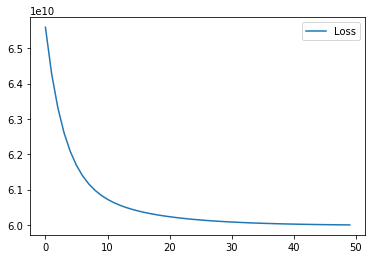

In [10]:
visualize(it, loss_array)

## Playground

Place to try snippets of code and log the outputs.